In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
df = pd.read_csv("gld_price_data.csv")
df.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


In [4]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
df2 = df.drop('Date',axis=1)

In [16]:
correlation = df2.corr()

<Axes: >

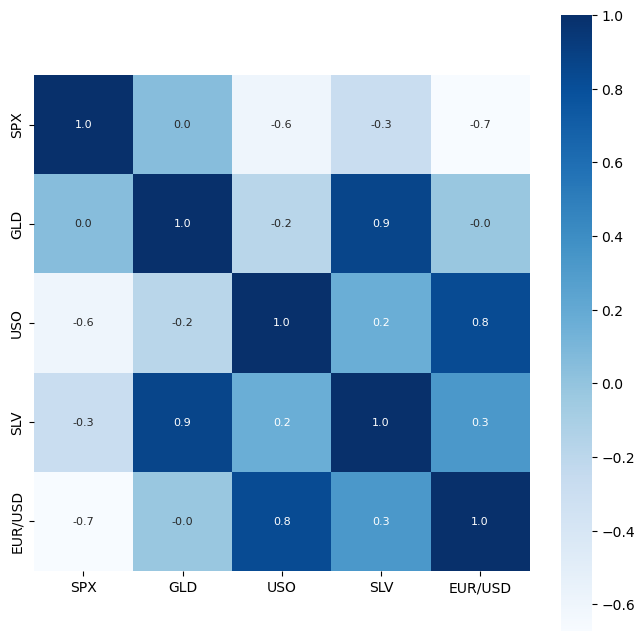

In [17]:
#Heatmap for better understanding of correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [18]:
#correlation values of gold 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\mhtsa\AppData\Local\Temp\ipykernel_1668\1087857141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

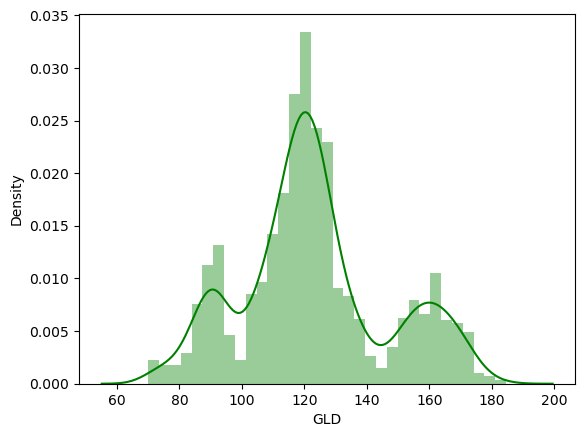

In [19]:
#Checking the distribution of gold prices
sns.distplot(df['GLD'], color='green')

# Splitting Independent and Dependent Features

In [20]:
x = df2.drop('GLD',axis=1)
y = df2['GLD']

In [21]:
x.head(3)

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492


In [22]:
y.head(3)

0    84.860001
1    85.570000
2    85.129997
Name: GLD, dtype: float64

In [23]:
#Splitting into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


# Model Training

In [25]:
model = RandomForestRegressor(n_estimators=100)

In [27]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
#Prediction on Test Data
test_pred = model.predict(x_test)

In [29]:
error_score = metrics.r2_score(y_test,test_pred)
print("R2 ERROR :",error_score)

R2 ERROR : 0.9894396497897636


# Comparing Actual and Predicted value through Visuals

In [30]:
y_test = list(y_test)

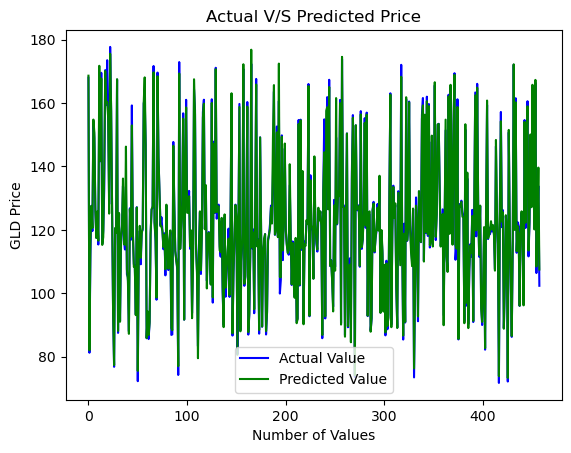

In [31]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_pred,color='green',label='Predicted Value')
plt.title("Actual V/S Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()